In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Посмотрим на тренировочную выборку и разметим её

In [2]:
chunksize = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',chunksize=chunksize):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)],axis = 0,ignore_index = True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.


In [3]:
train

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.128865e+19,0,14102209,1005,0,85f751fd,c4e18dd6,50e219e0,66f5e02e,6f7ca2ba,...,1,2,21772,300,50,2507,0,35,-1,157
1,1.475716e+19,0,14102205,1005,0,85f751fd,c4e18dd6,50e219e0,6415a993,2347f47a,...,1,0,21790,320,50,2513,3,35,-1,68
2,3.796795e+18,0,14102218,1005,0,85f751fd,c4e18dd6,50e219e0,93d786c6,2347f47a,...,1,0,21739,320,480,2502,0,35,-1,221
3,9.134266e+18,0,14102212,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,21836,300,250,2523,0,35,100083,221
4,1.032064e+19,0,14102211,1005,0,85f751fd,c4e18dd6,50e219e0,4b08f369,2347f47a,...,1,2,21767,320,50,2506,0,35,100143,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,9.312956e+18,0,14103019,1005,0,85f751fd,c4e18dd6,50e219e0,d36838b1,0e8616ad,...,1,0,23866,320,50,2736,0,33,-1,246
404286,1.109005e+19,0,14103020,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100075,23
404287,9.802719e+18,1,14103022,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23160,320,50,2667,0,47,-1,221
404288,5.518518e+18,0,14103021,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,-1,33


In [4]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
train = train.drop(columns=['id', 'site_id', 'app_id', 'device_id', 'device_ip', 'device_model'])

In [6]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102209,1005,0,c4e18dd6,50e219e0,6f7ca2ba,0f2161f8,1,2,21772,300,50,2507,0,35,-1,157
1,0,14102205,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21790,320,50,2513,3,35,-1,68
2,0,14102218,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21739,320,480,2502,0,35,-1,221
3,0,14102212,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,21836,300,250,2523,0,35,100083,221
4,0,14102211,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,2,21767,320,50,2506,0,35,100143,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,14103019,1005,0,c4e18dd6,50e219e0,0e8616ad,0f2161f8,1,0,23866,320,50,2736,0,33,-1,246
404286,0,14103020,1005,0,5c9ae867,f028772b,7801e8d9,07d7df22,1,0,16208,320,50,1800,3,167,100075,23
404287,1,14103022,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23160,320,50,2667,0,47,-1,221
404288,0,14103021,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33


In [7]:
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')

In [8]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,2014-10-22 09:00:00,1005,0,c4e18dd6,50e219e0,6f7ca2ba,0f2161f8,1,2,21772,300,50,2507,0,35,-1,157
1,0,2014-10-22 05:00:00,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21790,320,50,2513,3,35,-1,68
2,0,2014-10-22 18:00:00,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21739,320,480,2502,0,35,-1,221
3,0,2014-10-22 12:00:00,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,21836,300,250,2523,0,35,100083,221
4,0,2014-10-22 11:00:00,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,2,21767,320,50,2506,0,35,100143,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,2014-10-30 19:00:00,1005,0,c4e18dd6,50e219e0,0e8616ad,0f2161f8,1,0,23866,320,50,2736,0,33,-1,246
404286,0,2014-10-30 20:00:00,1005,0,5c9ae867,f028772b,7801e8d9,07d7df22,1,0,16208,320,50,1800,3,167,100075,23
404287,1,2014-10-30 22:00:00,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23160,320,50,2667,0,47,-1,221
404288,0,2014-10-30 21:00:00,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33


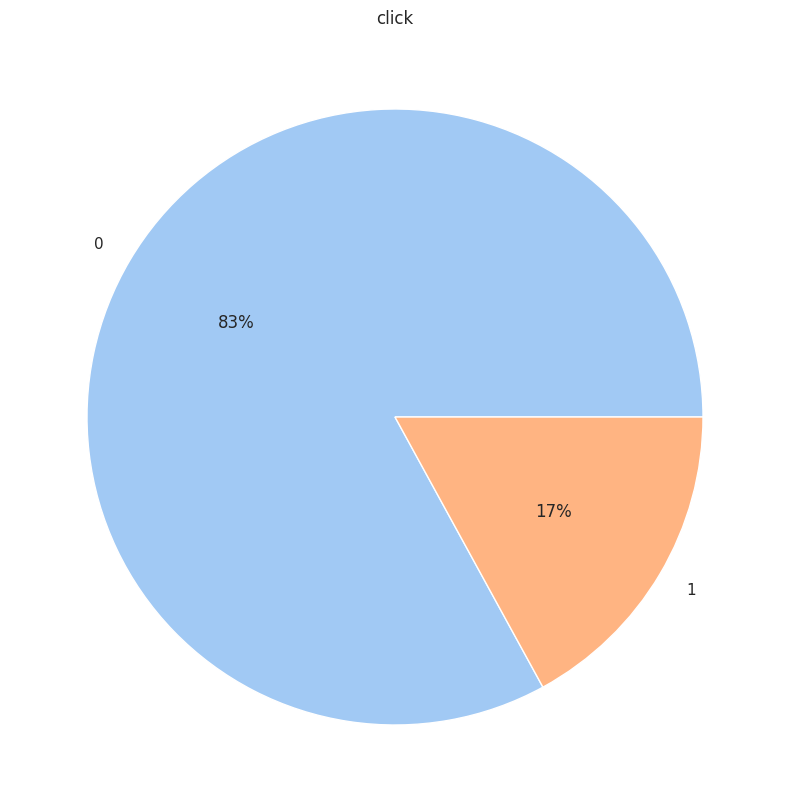

In [9]:
sns.set(rc={'figure.figsize': (10, 10)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(train['click'].unique())
dt = np.array([len(train[train['click'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('click')
plt.show()

<Axes: xlabel='hour', ylabel='click'>

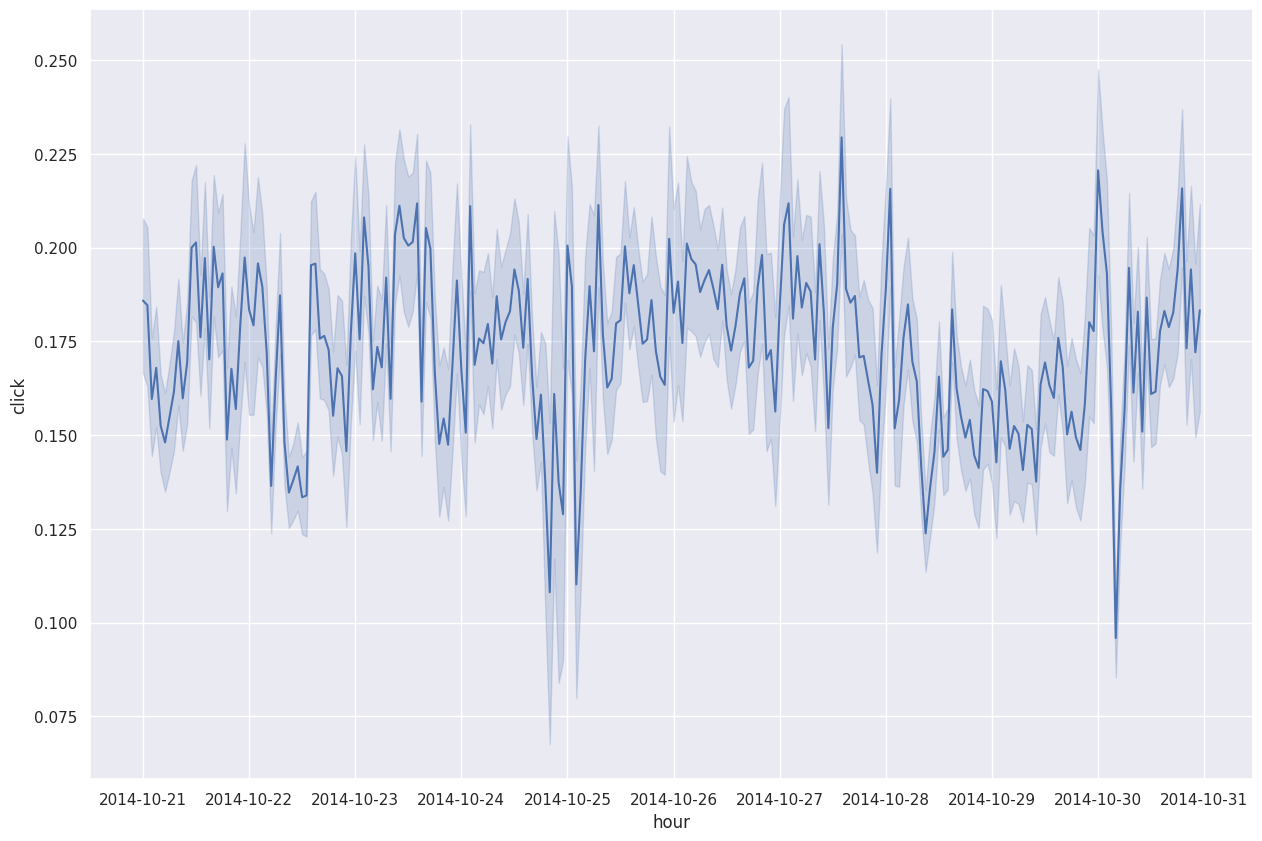

In [10]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour', y='click')

In [11]:
features = {
    'hour': [],
    'day': []
}

for elem in train['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    train[elem] = features[elem]

In [12]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,9,1005,0,c4e18dd6,50e219e0,6f7ca2ba,0f2161f8,1,2,21772,300,50,2507,0,35,-1,157,22
1,0,5,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21790,320,50,2513,3,35,-1,68,22
2,0,18,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,0,21739,320,480,2502,0,35,-1,221,22
3,0,12,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,21836,300,250,2523,0,35,100083,221,22
4,0,11,1005,0,c4e18dd6,50e219e0,2347f47a,0f2161f8,1,2,21767,320,50,2506,0,35,100143,157,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,19,1005,0,c4e18dd6,50e219e0,0e8616ad,0f2161f8,1,0,23866,320,50,2736,0,33,-1,246,30
404286,0,20,1005,0,5c9ae867,f028772b,7801e8d9,07d7df22,1,0,16208,320,50,1800,3,167,100075,23,30
404287,1,22,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23160,320,50,2667,0,47,-1,221,30
404288,0,21,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,30


In [13]:
train.isnull().sum()

click               0
hour                0
C1                  0
banner_pos          0
site_domain         0
site_category       0
app_domain          0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             404290 non-null  int64 
 1   hour              404290 non-null  int64 
 2   C1                404290 non-null  int64 
 3   banner_pos        404290 non-null  int64 
 4   site_domain       404290 non-null  object
 5   site_category     404290 non-null  object
 6   app_domain        404290 non-null  object
 7   app_category      404290 non-null  object
 8   device_type       404290 non-null  int64 
 9   device_conn_type  404290 non-null  int64 
 10  C14               404290 non-null  int64 
 11  C15               404290 non-null  int64 
 12  C16               404290 non-null  int64 
 13  C17               404290 non-null  int64 
 14  C18               404290 non-null  int64 
 15  C19               404290 non-null  int64 
 16  C20               404290 non-null  int

In [15]:
train['site_category'] = train['site_category'].astype('category')
train['site_category'] = train['site_category'].cat.codes

train['app_category'] = train['app_category'].astype('category')
train['app_category'] = train['app_category'].cat.codes

train['app_domain'] = train['app_domain'].astype('category')
train['app_domain'] = train['app_domain'].cat.codes

train['site_domain'] = train['site_domain'].astype('category')
train['site_domain'] = train['site_domain'].cat.codes

In [16]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,9,1005,0,1699,5,51,3,1,2,21772,300,50,2507,0,35,-1,157,22
1,0,5,1005,0,1699,5,16,3,1,0,21790,320,50,2513,3,35,-1,68,22
2,0,18,1005,0,1699,5,16,3,1,0,21739,320,480,2502,0,35,-1,221,22
3,0,12,1005,0,1046,3,57,0,1,0,21836,300,250,2523,0,35,100083,221,22
4,0,11,1005,0,1699,5,16,3,1,2,21767,320,50,2506,0,35,100143,157,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,19,1005,0,1699,5,4,3,1,0,23866,320,50,2736,0,33,-1,246,30
404286,0,20,1005,0,798,18,57,0,1,0,16208,320,50,1800,3,167,100075,23,30
404287,1,22,1005,0,1699,5,16,24,1,0,23160,320,50,2667,0,47,-1,221,30
404288,0,21,1005,0,1046,3,57,0,1,0,17654,300,250,1994,2,39,-1,33,30


In [17]:
train.describe()

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.170264,11.273247,1004.967961,0.287596,1470.449986,8.305179,55.488847,3.004895,1.015078,0.330107,18834.727428,318.818323,60.188058,2112.052465,1.437080,226.691096,53070.383566,83.252546,25.467283
std,0.375865,5.953374,1.096634,0.503310,517.505701,6.830175,23.439681,6.348679,0.526843,0.853625,4961.869226,20.548105,47.277140,609.520810,1.325497,350.863910,49965.977072,70.258056,2.963775
min,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,21.000000
25%,0.000000,6.000000,1005.000000,0.000000,1112.000000,3.000000,57.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,23.000000
50%,0.000000,11.000000,1005.000000,0.000000,1699.000000,5.000000,57.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100040.000000,61.000000,26.000000
75%,0.000000,16.000000,1005.000000,1.000000,1699.000000,18.000000,57.000000,3.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100090.000000,101.000000,28.000000
max,1.000000,23.000000,1012.000000,7.000000,2174.000000,19.000000,150.000000,25.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,30.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   click             404290 non-null  int64
 1   hour              404290 non-null  int64
 2   C1                404290 non-null  int64
 3   banner_pos        404290 non-null  int64
 4   site_domain       404290 non-null  int16
 5   site_category     404290 non-null  int8 
 6   app_domain        404290 non-null  int16
 7   app_category      404290 non-null  int8 
 8   device_type       404290 non-null  int64
 9   device_conn_type  404290 non-null  int64
 10  C14               404290 non-null  int64
 11  C15               404290 non-null  int64
 12  C16               404290 non-null  int64
 13  C17               404290 non-null  int64
 14  C18               404290 non-null  int64
 15  C19               404290 non-null  int64
 16  C20               404290 non-null  int64
 17  C21       

<Axes: >

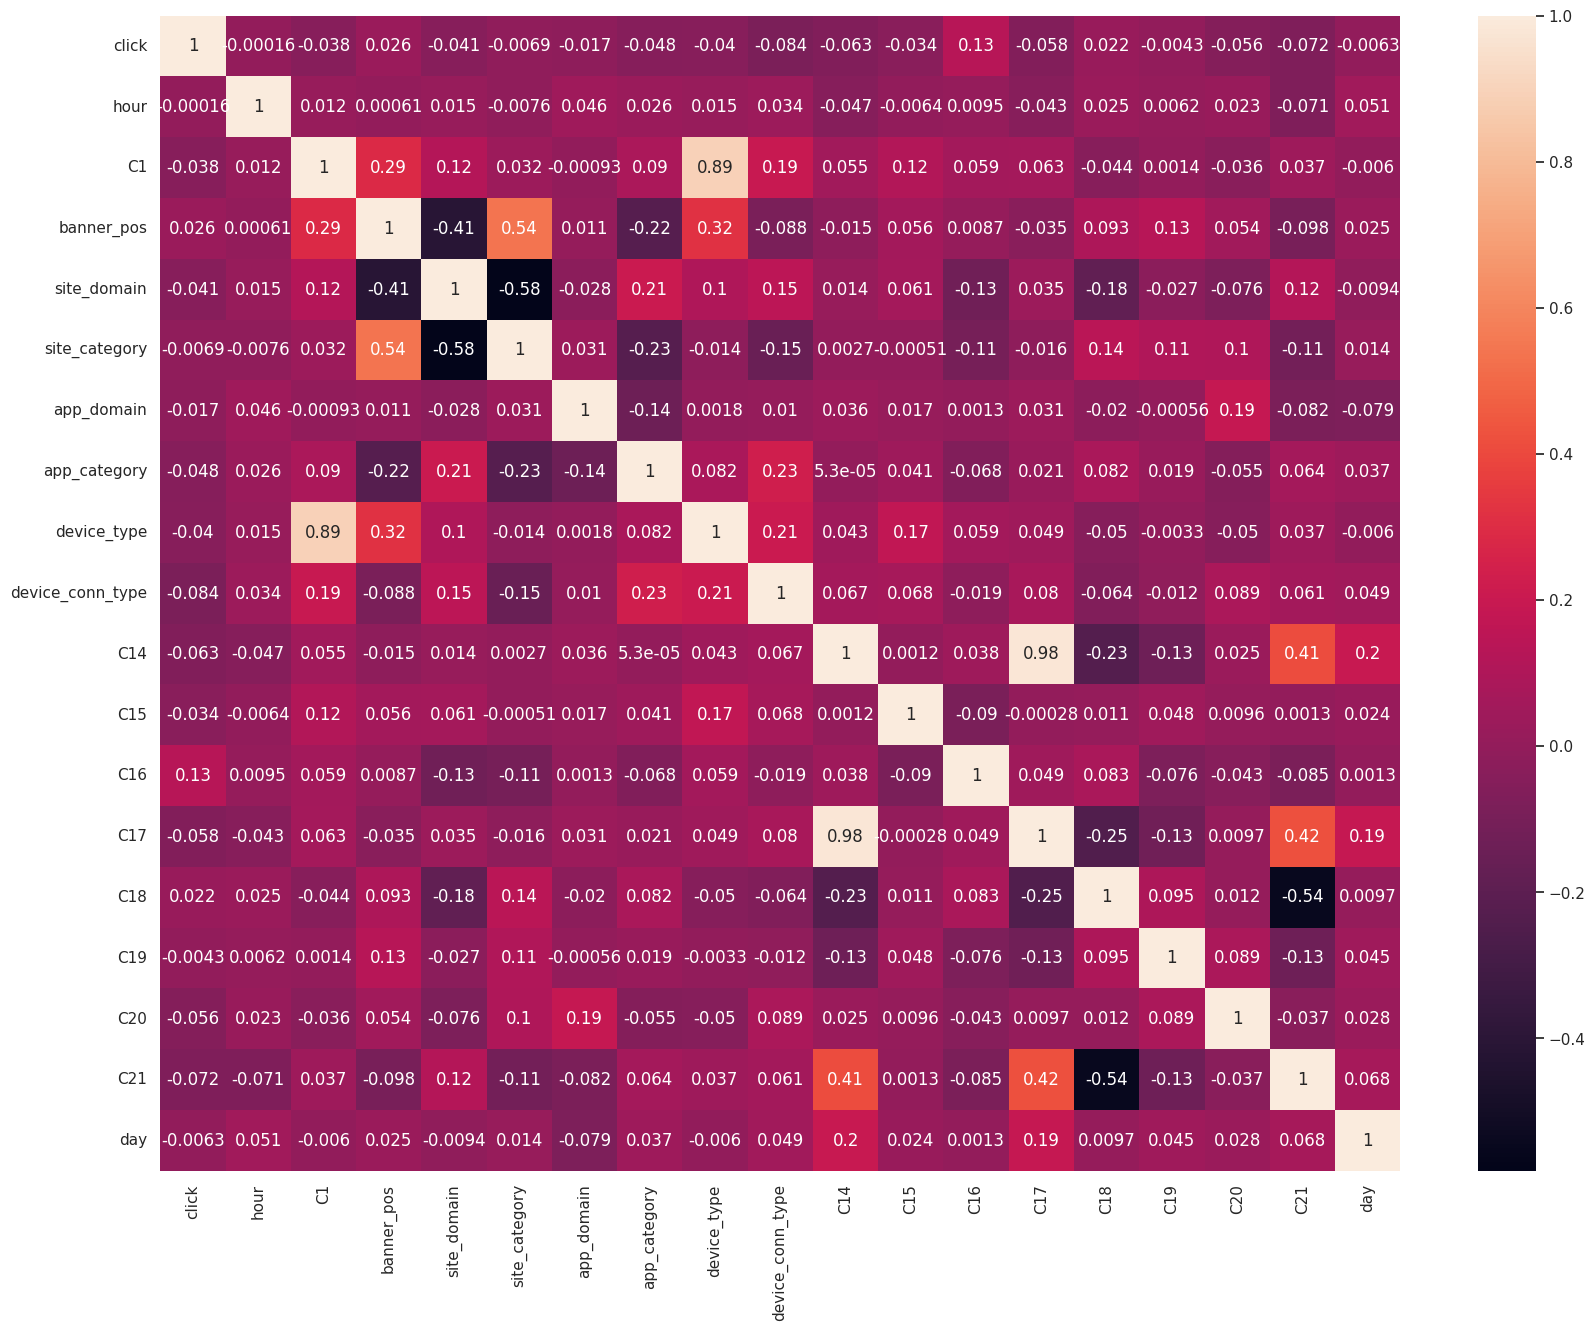

In [19]:
corr_matrix = train.corr()

sns.set(rc={'figure.figsize': (20, 15)})

sns.heatmap(corr_matrix, annot=True)

In [20]:
import math
from sklearn import preprocessing

scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(columns=['click']), train['click'])

StandardScaler()

In [21]:
df_scaled = scaled.transform(train.drop(columns=['click']))

In [22]:
df_scaled

array([[-0.38184227,  0.02921571, -0.57140957, ..., -1.06215173,
         1.04966675, -1.16988889],
       [-1.05373104,  0.02921571, -0.57140957, ..., -1.06215173,
        -0.21709347, -1.16988889],
       [ 1.12990746,  0.02921571, -0.57140957, ..., -1.06215173,
         1.96059544, -1.16988889],
       ...,
       [ 1.80179623,  0.02921571, -0.57140957, ..., -1.06215173,
         1.96059544,  1.52937451],
       [ 1.63382403,  0.02921571, -0.57140957, ..., -1.06215173,
        -0.7152576 ,  1.52937451],
       [ 1.80179623,  0.02921571, -0.57140957, ..., -1.06215173,
        -0.3167263 ,  1.52937451]])

In [23]:
df_scaled.shape

(404290, 18)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=5)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.1504177  0.12459129 0.11517352 0.07101365 0.06942546]


In [26]:
print(pca.components_)

[[ 0.0341925  -0.12209075  0.19585203 -0.267525    0.25667275  0.03001898
  -0.13879857 -0.12013229 -0.17319848 -0.45163175 -0.02933253  0.01160851
  -0.46289462  0.33609905  0.15441558  0.04693546 -0.41525621 -0.11329291]
 [-0.00708285  0.44374532  0.50564521 -0.28331307  0.38354098  0.05202269
  -0.14146018  0.44633293  0.03571658  0.19003626  0.11008001  0.04686213
   0.18099292  0.00306757  0.05648894  0.06683739  0.03094077  0.07054006]
 [ 0.05961618  0.43025373 -0.07122885  0.34276779 -0.29054197 -0.06578311
   0.28120168  0.44251815  0.26465272 -0.30947598  0.15879142 -0.00691334
  -0.29532871  0.07712892  0.04820512 -0.09450325 -0.14225856 -0.09688453]
 [ 0.19909695 -0.10438828 -0.05160654  0.0552422   0.0527998   0.30888864
   0.19166968 -0.10534408  0.3326037   0.09245003  0.22361805 -0.30287541
   0.08502522  0.13449475  0.35499815  0.55128875 -0.11760075  0.26021547]
 [ 0.10528936 -0.02662228 -0.04297777 -0.12659071 -0.02928248 -0.34288451
   0.32601345 -0.03681458  0.09066

In [27]:
zzz = pca.transform(df_scaled)

In [28]:
zzz

array([[-2.05679167, -0.57310526,  0.27586393, -0.83926052, -0.62001018],
       [-0.46681373, -0.65234553,  0.21926657, -1.54133732,  0.9431375 ],
       [-1.93856437, -0.18636918, -0.18928277, -4.42431442,  2.79679222],
       ...,
       [-3.03546316, -0.78951564,  0.41536047, -0.13777043,  1.8751115 ],
       [ 0.503111  , -0.31645245, -0.13854753, -1.6265298 ,  2.81800545],
       [-0.13223632, -0.34658776,  0.05575129,  1.24797421,  0.65718951]])

In [29]:
zzz.shape

(404290, 5)

In [30]:
pd.DataFrame(pca.components_, columns=train.columns[1:])

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0.034193,-0.122091,0.195852,-0.267525,0.256673,0.030019,-0.138799,-0.120132,-0.173198,-0.451632,-0.029333,0.011609,-0.462895,0.336099,0.154416,0.046935,-0.415256,-0.113293
1,-0.007083,0.443745,0.505645,-0.283313,0.383541,0.052023,-0.141460,0.446333,0.035717,0.190036,0.110080,0.046862,0.180993,0.003068,0.056489,0.066837,0.030941,0.070540
2,0.059616,0.430254,-0.071229,0.342768,-0.290542,-0.065783,0.281202,0.442518,0.264653,-0.309476,0.158791,-0.006913,-0.295329,0.077129,0.048205,-0.094503,-0.142259,-0.096885
3,0.199097,-0.104388,-0.051607,0.055242,0.052800,0.308889,0.191670,-0.105344,0.332604,0.092450,0.223618,-0.302875,0.085025,0.134495,0.354998,0.551289,-0.117601,0.260215
4,0.105289,-0.026622,-0.042978,-0.126591,-0.029282,-0.342885,0.326013,-0.036815,0.090665,0.194996,-0.106029,0.362282,0.195557,0.492104,-0.007335,-0.199891,-0.253486,0.413348


In [31]:
pd.Series(pca.noise_variance_, train.columns[1:])

hour                0.64991
C1                  0.64991
banner_pos          0.64991
site_domain         0.64991
site_category       0.64991
app_domain          0.64991
app_category        0.64991
device_type         0.64991
device_conn_type    0.64991
C14                 0.64991
C15                 0.64991
C16                 0.64991
C17                 0.64991
C18                 0.64991
C19                 0.64991
C20                 0.64991
C21                 0.64991
day                 0.64991
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(zzz, Y, test_size=0.1, random_state=42)

# Обучим модель

In [33]:
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [34]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=80,
    shuffle=True,
    max_iter=10000,
    warm_start=True
)

In [35]:
sgd.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

SGDClassifier(loss='log_loss', max_iter=10000, n_iter_no_change=80,
              warm_start=True)

In [36]:
cat = CatBoostClassifier(
    iterations=5000,
    verbose=1000,
    learning_rate=0.005,
    l2_leaf_reg=0.03,
    depth=7,
    leaf_estimation_method='Newton',
    leaf_estimation_iterations=65,
    use_best_model=True
)

In [37]:
cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid))

0:	learn: 0.6902096	test: 0.6902197	best: 0.6902197 (0)	total: 164ms	remaining: 13m 37s
1000:	learn: 0.4275331	test: 0.4275146	best: 0.4275146 (1000)	total: 1m 39s	remaining: 6m 39s
2000:	learn: 0.4232959	test: 0.4239594	best: 0.4239594 (2000)	total: 3m 21s	remaining: 5m 1s
3000:	learn: 0.4206073	test: 0.4221209	best: 0.4221209 (3000)	total: 5m 3s	remaining: 3m 21s
4000:	learn: 0.4183810	test: 0.4208749	best: 0.4208749 (4000)	total: 6m 46s	remaining: 1m 41s
4999:	learn: 0.4164668	test: 0.4199908	best: 0.4199908 (4999)	total: 8m 32s	remaining: 0us

bestTest = 0.4199908347
bestIteration = 4999



In [38]:
from sklearn.metrics import log_loss


preds_val_sgd = sgd.predict_proba(X_valid)
preds_val_cat = cat.predict_proba(X_valid)

In [39]:
preds_val_sgd = np.array(list(map(lambda x: x[1], preds_val_sgd)))
preds_val_cat = np.array(list(map(lambda x: x[1], preds_val_cat)))

In [40]:
preds_val_sgd

array([0.27574187, 0.15533306, 0.26943023, ..., 0.14411365, 0.14170684,
       0.10295447])

In [41]:
preds_val_cat

array([0.18666937, 0.19299328, 0.09610981, ..., 0.08129743, 0.14935273,
       0.12144867])

In [42]:
log_loss(y_pred=preds_val_sgd, y_true=Y_valid)

0.45255300939326315

In [43]:
log_loss(y_pred=preds_val_cat, y_true=Y_valid)

0.41999083471078463

In [44]:
pred_val = [(i + j) / 2 for i, j in zip(preds_val_sgd, preds_val_cat)]

In [45]:
log_loss(y_pred=pred_val, y_true=Y_valid)

0.4288939918859084

# Тоже самое сделаем с тестовой выбокрой

In [46]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [47]:
test_df = test_df.drop(columns=['id', 'site_id', 'app_id', 'device_id', 'device_ip', 'device_model'])

test_df['hour'] = pd.to_datetime(test_df['hour'], format = '%y%m%d%H')
features = {
    'hour': [],
    'day': []
}

for elem in test_df['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    test_df[elem] = features[elem]

In [48]:
test_df

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,f6ebf28e,f028772b,7801e8d9,07d7df22,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,c4e18dd6,50e219e0,aefc06bd,0f2161f8,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,f3845767,f028772b,7801e8d9,07d7df22,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,c4e18dd6,50e219e0,ae637522,0f2161f8,1,3,23857,320,50,2734,1,175,100189,71,31


In [49]:
test_df.isnull().sum()

hour                0
C1                  0
banner_pos          0
site_domain         0
site_category       0
app_domain          0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 18 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hour              int64 
 1   C1                object
 2   banner_pos        object
 3   site_domain       object
 4   site_category     object
 5   app_domain        object
 6   app_category      object
 7   device_type       object
 8   device_conn_type  object
 9   C14               object
 10  C15               object
 11  C16               object
 12  C17               object
 13  C18               object
 14  C19               object
 15  C20               object
 16  C21               object
 17  day               int64 
dtypes: int64(2), object(16)
memory usage: 628.6+ MB


In [51]:
test_df['site_category'] = test_df['site_category'].astype('category')
test_df['site_category'] = test_df['site_category'].cat.codes

test_df['app_category'] = test_df['app_category'].astype('category')
test_df['app_category'] = test_df['app_category'].cat.codes

test_df['app_domain'] = test_df['app_domain'].astype('category')
test_df['app_domain'] = test_df['app_domain'].cat.codes

test_df['site_domain'] = test_df['site_domain'].astype('category')
test_df['site_domain'] = test_df['site_domain'].cat.codes

In [52]:
test_df

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,3234,20,94,0,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,3197,1,94,0,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,3197,1,94,0,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,2590,5,137,3,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,2590,5,21,26,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,1565,3,94,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,3197,20,94,0,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,1565,3,94,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,2590,5,136,3,1,3,23857,320,50,2734,1,175,100189,71,31


# Предскажем тест

In [53]:
test_df_scaled = scaled.transform(test_df)

In [54]:
test_df_scaled

array([[-1.893592  ,  0.02921571, -0.57140957, ...,  0.94073362,
        -0.85759021,  1.86678244],
       [-1.893592  ,  0.02921571, -0.57140957, ...,  0.94089373,
        -0.45905891,  1.86678244],
       [-1.893592  ,  0.02921571, -0.57140957, ...,  0.94089373,
        -0.45905891,  1.86678244],
       ...,
       [ 1.96976842,  0.02921571, -0.57140957, ..., -1.06215173,
        -0.7152576 ,  1.86678244],
       [ 1.96976842,  0.02921571, -0.57140957, ...,  0.94301518,
        -0.17439369,  1.86678244],
       [ 1.96976842,  0.02921571, -0.57140957, ...,  0.94091374,
         1.96059544,  1.86678244]])

In [55]:
test_df_zzz = pca.transform(test_df_scaled)

In [56]:
test_df_zzz

array([[ 2.07335559, -1.0894337 ,  1.51131205,  1.12472253, -0.9569533 ],
       [-2.32386264, -1.05297171,  0.25094749,  1.00712408, -0.91941789],
       [-2.32386264, -1.05297171,  0.25094749,  1.00712408, -0.91941789],
       ...,
       [ 0.25545965, -0.49704366,  0.08870846, -0.92885632,  2.32463678],
       [-2.34819038, -0.25744285,  0.7600721 ,  3.80467   , -0.14299359],
       [-2.21592261,  0.0879681 , -0.55604684,  2.02154213, -1.25510012]])

In [57]:
predict_test_sgd = sgd.predict_proba(test_df_zzz)
predict_test_cat = cat.predict_proba(test_df_zzz)

In [58]:
predict_test_sgd = np.array(list(map(lambda x: x[1], predict_test_sgd)))
predict_test_cat = np.array(list(map(lambda x: x[1], predict_test_cat)))

In [59]:
predict_test = np.array([(i + j) / 2 for i, j in zip(predict_test_sgd, predict_test_cat)])

In [60]:
len([i for i in predict_test if i >= 0.5])

0

In [61]:
len([i for i in predict_test if i <= 0.5])

4577464

# Сохраним ответ

In [62]:
submit_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [63]:
submit_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [64]:
submit_df.columns

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [65]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [66]:
test_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [67]:
submit_df["click"] = predict_test
submit_df[['id', 'click']].to_csv("submission_difm.csv", index=False)

In [68]:
submit_df[['id', 'click']]

,id,click
0,10000174058809263569,0.096017
1,10000182526920855428,0.085051
2,10000554139829213984,0.085051
3,10001094637809798845,0.062045
4,10001377041558670745,0.157127
...,...,...
4577459,9998166651591969718,0.282974
4577460,9998249812366450951,0.105458
4577461,99988023653614546,0.282974
4577462,9999086574712596585,0.034191
